In [1]:
import numpy as np
import pandas as pd
import math

pd.set_option('display.max_rows', 80)

import random
import time
import pickle

import sys
sys.path.append("../../")

from src.object import *
from src.create import *
from src.print_result import *

from config.formation import *
from config.config import *

In [2]:
with open('../../data/pickle/20221012v1_30y.pickle', mode='rb') as f:
    England = pickle.load(f)

In [3]:
#England = ProSoccerLeague(name="england", leagues=[L1, L2, L3])
all_member = pd.DataFrame()
for l in England.leagues:
    for t in l.teams:
        for p in t.affilation_players:
            buff = pd.DataFrame(np.array([[p.name, t.name, l.name, p.uuid, p.age, p.born_year, p.main_position, p.main_rate, p.grow_type, p.pace, p.shooting, p.passing, p.dribbling, p.defending, p.physicality, "現役"]]), 
                                columns = ["名前", "チーム", "リーグ", "uuid", "年齢", "生まれ年", "ポジション", "Rate", "成長タイプ", "pac", "sho", "pas", "dri", "def", "phy", "進退"])
            all_member = pd.concat([all_member, buff])
for p in England.retire_players:
    buff = pd.DataFrame(np.array([[p.name, t.name, l.name, p.uuid, p.age, p.born_year, p.main_position, p.main_rate, p.grow_type, p.pace, p.shooting, p.passing, p.dribbling, p.defending, p.physicality, "引退"]]), 
                        columns = ["名前", "チーム", "リーグ", "uuid", "年齢", "生まれ年", "ポジション", "Rate", "成長タイプ","pac", "sho", "pas", "dri", "def", "phy", "進退"])
    all_member = pd.concat([all_member, buff])

for p in England.free_players:
    buff = pd.DataFrame(np.array([[p.name, t.name, l.name, p.uuid, p.age, p.born_year, p.main_position, p.main_rate,  p.grow_type, p.pace, p.shooting, p.passing, p.dribbling, p.defending, p.physicality, "フリー"]]), 
                        columns = ["名前", "チーム", "リーグ", "uuid", "年齢", "生まれ年", "ポジション", "Rate", "成長タイプ","pac", "sho", "pas", "dri", "def", "phy", "進退"])
    all_member = pd.concat([all_member, buff])
all_member = all_member.reset_index(drop=True)

In [4]:
output = England.players_result
end_year = 2030

## Rateの分布

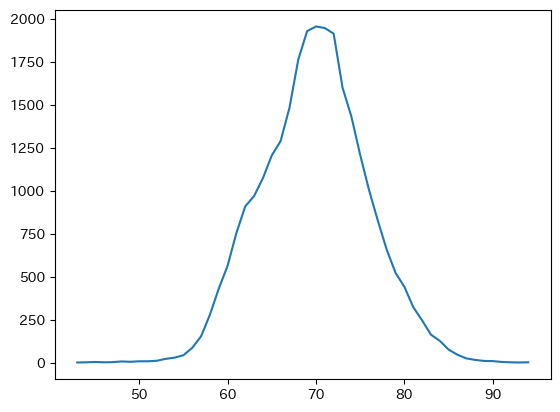

In [5]:
rate_list = output["Rate"].unique()
rate_list.sort()
rate_num = []
for rate in rate_list:
    rate_num.append(len(output.groupby("Rate").get_group(rate).groupby("uuid").mean()))
plt.plot(rate_list, rate_num)

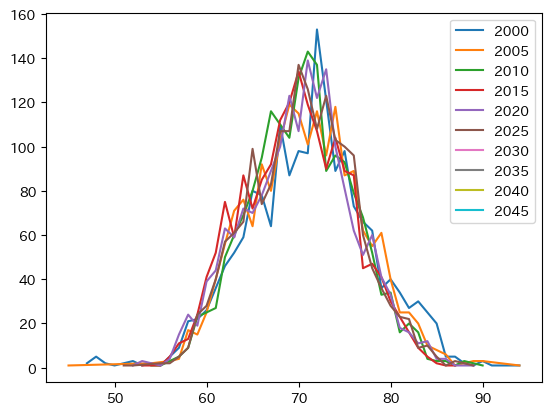

In [6]:
for i in range(2000, 2050, 5):
    output_ = output[output["年度"]==i]
    rate_list = output_["Rate"].unique()
    rate_list.sort()
    rate_num = []
    for rate in rate_list:
        rate_num.append(len(output_.groupby("Rate").get_group(rate).groupby("uuid").mean()))
    plt.plot(rate_list, rate_num, label=i)
plt.legend()
plt.show()

## ポジションごとのrate

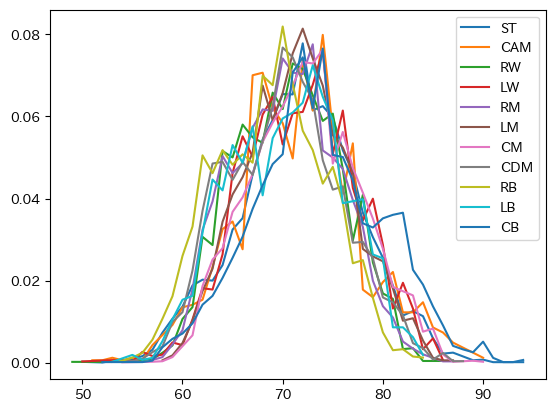

In [7]:
for pos in ALL_POSITON:
    output_ = output[output["ポジション"]==pos]
    if len(output_) < 100:
        continue
    b = output_["Rate"].value_counts().sort_index()
    x = output_["Rate"].unique()
    x.sort()
    plt.plot(x, b/len(output_), label=pos)
plt.legend()
plt.show()

In [8]:
output.groupby("ポジション")["Rate"].describe()

,count,mean,std,min,25%,50%,75%,max
ポジション,,,,,,,,
CAM,1628.0,71.440418,6.115123,51.0,67.0,72.0,75.0,90.0
CB,11656.0,73.442519,6.319585,52.0,69.0,73.0,78.0,94.0
CDM,5028.0,70.176014,5.655961,54.0,66.0,70.0,74.0,88.0
CF,19.0,64.210526,5.006429,57.0,61.0,62.0,66.5,79.0
CM,7917.0,72.215486,5.463513,54.0,68.0,72.0,76.0,90.0
GK,7570.0,70.963144,5.869285,43.0,67.0,71.0,75.0,88.0
LB,4168.0,70.459933,5.644141,53.0,66.0,71.0,75.0,84.0
LM,3318.0,71.518987,5.151439,58.0,68.0,72.0,75.0,87.0
LW,3028.0,71.707398,5.588604,50.0,68.0,72.0,76.0,86.0


## 年代別

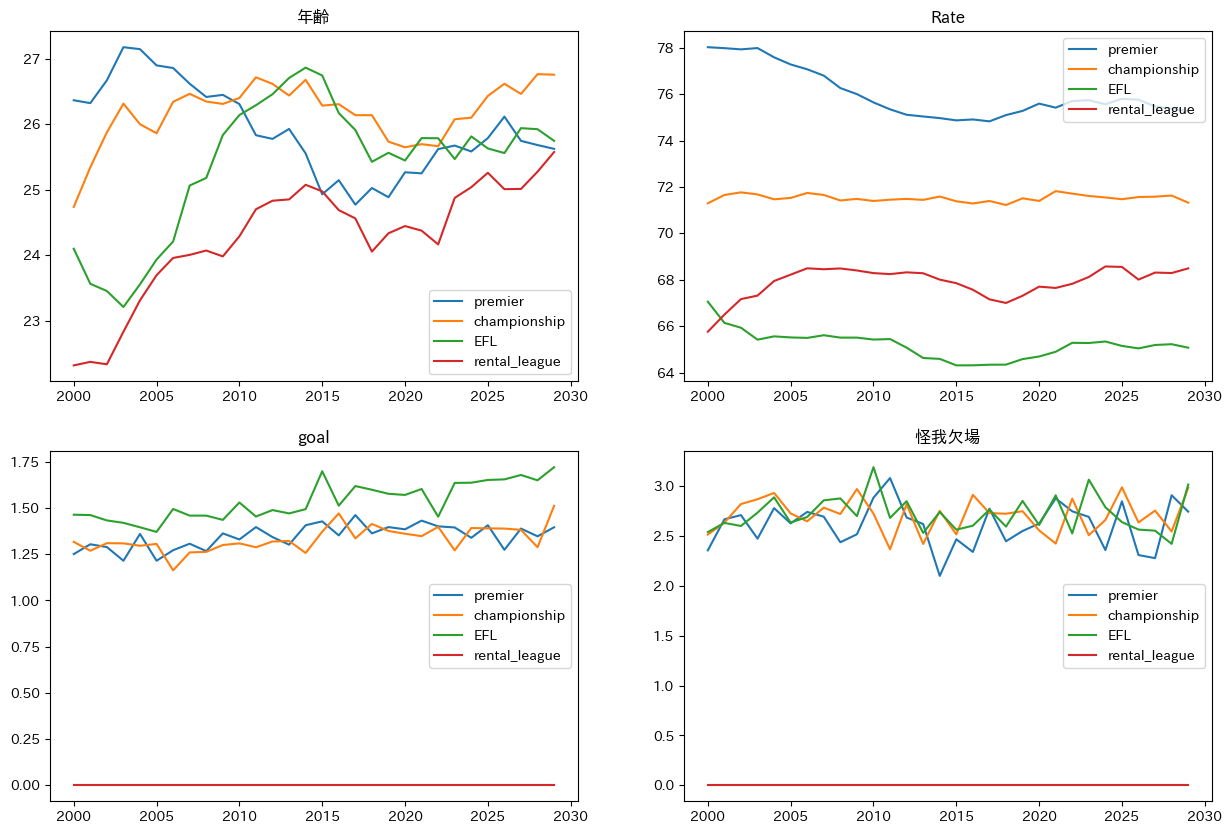

In [9]:
columns = ["年齢", "Rate", "goal", "怪我欠場"]
plt.figure(figsize=(15, 10))
for i, cl in enumerate(columns):
    plt.subplot(2, 2, i+1)
    for league_num in range(3):
        output_ = output[output["リーグ"]==England.leagues[league_num].name]
        plt.plot([y for y in range(2000, end_year)], output_.groupby("年度")[cl].describe()["mean"], label=England.leagues[league_num].name)
    output_ = output[output["リーグ"]=="rental_league"]
    plt.plot([y for y in range(2000, end_year)], output_.groupby("年度")[cl].describe()["mean"], label="rental_league")
    plt.title(cl)
    plt.legend()

In [10]:
output_ = output[output["Rate"]>84]
for year in range(2000, end_year, 4):
    _output_ = output_[output_["年度"]==year]
    display(_output_.groupby("Rate").count())

,名前,uuid,年齢,残契約,ポジション,リーグ,年度,チーム,レンタル元,分類,順位,試合数,goal,assist,CS,怪我欠場,怪我回数,賞
Rate,,,,,,,,,,,,,,,,,,
85,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40
86,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
87,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
88,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
89,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
90,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
91,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
93,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
94,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


,名前,uuid,年齢,残契約,ポジション,リーグ,年度,チーム,レンタル元,分類,順位,試合数,goal,assist,CS,怪我欠場,怪我回数,賞
Rate,,,,,,,,,,,,,,,,,,
85,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
86,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
87,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
88,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
89,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
90,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
94,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


,名前,uuid,年齢,残契約,ポジション,リーグ,年度,チーム,レンタル元,分類,順位,試合数,goal,assist,CS,怪我欠場,怪我回数,賞
Rate,,,,,,,,,,,,,,,,,,
85,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
86,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
87,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
88,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
89,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
90,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
91,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


,名前,uuid,年齢,残契約,ポジション,リーグ,年度,チーム,レンタル元,分類,順位,試合数,goal,assist,CS,怪我欠場,怪我回数,賞
Rate,,,,,,,,,,,,,,,,,,
85,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
86,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
87,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
88,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


,名前,uuid,年齢,残契約,ポジション,リーグ,年度,チーム,レンタル元,分類,順位,試合数,goal,assist,CS,怪我欠場,怪我回数,賞
Rate,,,,,,,,,,,,,,,,,,
85,8,8,8,8,6,8,8,8,8,8,8,8,8,8,8,8,8,8
86,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
87,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


,名前,uuid,年齢,残契約,ポジション,リーグ,年度,チーム,レンタル元,分類,順位,試合数,goal,assist,CS,怪我欠場,怪我回数,賞
Rate,,,,,,,,,,,,,,,,,,
85,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
86,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
87,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
89,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


,名前,uuid,年齢,残契約,ポジション,リーグ,年度,チーム,レンタル元,分類,順位,試合数,goal,assist,CS,怪我欠場,怪我回数,賞
Rate,,,,,,,,,,,,,,,,,,
85,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
86,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
87,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
88,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
89,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


,名前,uuid,年齢,残契約,ポジション,リーグ,年度,チーム,レンタル元,分類,順位,試合数,goal,assist,CS,怪我欠場,怪我回数,賞
Rate,,,,,,,,,,,,,,,,,,
85,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
86,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
87,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
89,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [11]:
for year in range(2000, end_year, 10):
    output_ = output[((output["年度"]>=year))]
    output_ = output_[output_["年度"]<year+10]
    display(output_.groupby("ポジション")["Rate"].describe())

,count,mean,std,min,25%,50%,75%,max
ポジション,,,,,,,,
CAM,599.0,72.365609,6.532775,57.0,68.00,72.0,76.00,90.0
CB,4021.0,75.000497,6.246472,58.0,71.00,74.0,80.00,94.0
CDM,1734.0,71.446367,5.712910,59.0,67.00,71.0,75.00,88.0
CF,12.0,65.250000,5.479300,60.0,61.75,63.0,67.25,79.0
CM,2623.0,73.130004,5.584066,57.0,69.00,73.0,77.00,90.0
GK,2518.0,70.248610,6.111023,43.0,67.00,71.0,74.00,86.0
LB,1392.0,71.449713,5.600175,56.0,67.00,72.0,75.00,84.0
LM,1140.0,72.552632,5.282024,60.0,69.00,72.0,76.00,86.0
LW,1087.0,71.984361,5.948732,53.0,68.00,72.0,77.00,86.0


,count,mean,std,min,25%,50%,75%,max
ポジション,,,,,,,,
CAM,506.0,70.847826,5.582023,55.0,67.00,71.0,75.00,83.0
CB,3842.0,72.724362,5.726817,56.0,69.00,72.0,76.00,90.0
CDM,1647.0,69.564663,5.518381,56.0,65.00,70.0,73.00,84.0
CF,2.0,62.500000,2.121320,61.0,61.75,62.5,63.25,64.0
CM,2638.0,71.616376,5.408170,57.0,67.00,72.0,75.00,85.0
GK,2510.0,71.215936,6.129757,50.0,67.00,71.0,75.00,88.0
LB,1378.0,69.767779,5.610557,55.0,65.00,70.0,74.00,84.0
LM,1098.0,70.956284,4.958708,58.0,68.00,71.0,74.00,84.0
LW,1005.0,71.420896,5.189531,56.0,67.00,72.0,76.00,83.0


,count,mean,std,min,25%,50%,75%,max
ポジション,,,,,,,,
CAM,523.0,70.954111,5.996630,51.0,67.0,71.0,74.00,87.0
CB,3793.0,72.518323,6.649390,52.0,68.0,73.0,77.00,89.0
CDM,1647.0,69.449909,5.502988,54.0,65.0,70.0,73.00,83.0
CF,5.0,62.400000,4.505552,57.0,60.0,61.0,66.00,68.0
CM,2656.0,71.907380,5.279860,54.0,68.0,72.0,76.00,85.0
GK,2542.0,71.421322,5.267043,50.0,68.0,71.5,75.00,87.0
LB,1398.0,70.156652,5.588021,53.0,66.0,70.0,74.75,82.0
LM,1080.0,71.000000,5.040705,59.0,67.0,71.0,74.00,87.0
LW,936.0,71.693376,5.560075,50.0,68.0,72.0,75.00,85.0


## 18歳のRate

In [12]:
output[output["年齢"]==18]["Rate"].value_counts().sort_index()

53      1
54      3
55     11
56     23
57     78
58    159
59    241
60    282
61    327
62    341
63    275
64    247
65    314
66    467
67    528
68    689
69    653
70    491
71    355
72    215
73     78
74     59
75     24
76      7
77     16
78      8
79      4
Name: Rate, dtype: int64

In [25]:
output[((output["年齢"]==18)&(output["Rate"]==79))]

,名前,uuid,年齢,Rate,残契約,ポジション,リーグ,年度,チーム,レンタル元,分類,順位,試合数,goal,assist,CS,怪我欠場,怪我回数,賞
33847,Bransen,c219a1a4-4978-11ed-a42d-00155d14f69a,18,79,4,ST,premier,2010,Portsmouth,,リーグ,16位,14,5,2,4,0,0,
33872,Bransen,c219a1a4-4978-11ed-a42d-00155d14f69a,18,79,4,ST,premier,2010,Portsmouth,,カップ戦,16位,1,3,0,1,0,0,
42457,Garth,c82fd072-4978-11ed-a42d-00155d14f69a,18,79,4,ST,EFL,2012,Derby,,リーグ,5位,36,31,4,5,3,1,"得点王(EFL_2012),"
42482,Garth,c82fd072-4978-11ed-a42d-00155d14f69a,18,79,4,ST,EFL,2012,Derby,,カップ戦,5位,1,0,0,0,0,0,


## 怪我割合

In [14]:
print(output["怪我欠場"].sum()/3/20/(end_year-2000))
print(output[output["試合数"]>0]["怪我欠場"].value_counts())

133.88444444444445
0     38755
1      4162
2      2029
3      1808
4      1558
5      1480
6      1407
8      1259
7      1240
10     1147
9      1137
11     1070
12      922
13      837
14      751
15      697
16      626
17      610
18      511
19      435
20      394
21      360
22      319
23      273
24      247
25      191
26      189
27      146
28      116
30       79
29       74
32       71
31       67
33       47
35       39
34       33
36       27
37        8
38        1
Name: 怪我欠場, dtype: int64


## 90以上の人数

In [15]:
output[output["Rate"]>89].groupby("uuid").mean()

,年齢,Rate,残契約,年度,試合数,goal,assist,CS,怪我欠場,怪我回数
uuid,,,,,,,,,,
a399eba8-4978-11ed-a42d-00155d14f69a,28.0,90.000000,0.800000,2002.0,18.400000,11.800000,2.300000,7.300000,3.100000,0.500000
a3a65a50-4978-11ed-a42d-00155d14f69a,28.0,90.000000,0.800000,2005.0,16.200000,1.300000,0.300000,8.200000,5.900000,1.100000
a3a68886-4978-11ed-a42d-00155d14f69a,29.5,90.750000,0.750000,2001.5,12.625000,0.625000,0.750000,5.500000,9.375000,1.250000
a3ef701e-4978-11ed-a42d-00155d14f69a,28.0,90.000000,0.714286,2007.0,18.571429,0.928571,0.500000,6.428571,2.071429,0.500000
a40c27ea-4978-11ed-a42d-00155d14f69a,28.0,90.000000,0.600000,2002.0,15.500000,2.200000,1.500000,6.300000,5.500000,0.900000
a4154d34-4978-11ed-a42d-00155d14f69a,28.0,90.000000,0.800000,2002.0,13.600000,0.400000,0.100000,7.300000,8.000000,1.400000
a417ce4c-4978-11ed-a42d-00155d14f69a,27.5,92.375000,0.625000,2005.5,11.687500,0.312500,0.125000,5.875000,9.812500,1.187500
a41b5a9e-4978-11ed-a42d-00155d14f69a,31.0,92.333333,0.666667,2001.0,16.666667,9.833333,1.000000,5.166667,4.166667,0.500000
a42fba70-4978-11ed-a42d-00155d14f69a,27.5,90.000000,0.833333,2003.5,15.750000,0.583333,0.666667,7.333333,5.750000,0.916667


## チーム能力

In [16]:
for t in England.leagues[0].teams:
    print(t.name, t.formation.team_rate)

Wrexham {'ATT': 84.5, 'MID': 73.0, 'DEF': 79.75, 'GK': 83, 'ALL': 78.45454545454545}
Edinburgh {'ATT': 76.33333333333333, 'MID': 73.66666666666667, 'DEF': 76.25, 'GK': 87, 'ALL': 76.54545454545455}
Greenock {'ATT': 76.33333333333333, 'MID': 69.66666666666667, 'DEF': 72.0, 'GK': 79, 'ALL': 73.18181818181819}
Karlsruhe {'ATT': 77.0, 'MID': 78.33333333333333, 'DEF': 78.0, 'GK': 84, 'ALL': 78.36363636363636}
Stoke-on-Trent {'ATT': 71.33333333333333, 'MID': 70.66666666666667, 'DEF': 73.25, 'GK': 79, 'ALL': 72.54545454545455}
Dublin {'ATT': 83.5, 'MID': 74.75, 'DEF': 74.75, 'GK': 87, 'ALL': 77.45454545454545}
Belfast {'ATT': 79.0, 'MID': 69.75, 'DEF': 76.0, 'GK': 79, 'ALL': 74.54545454545455}
Arnhem {'ATT': 82.0, 'MID': 77.0, 'DEF': 76.0, 'GK': 81, 'ALL': 77.45454545454545}
Duisburg {'ATT': 75.33333333333333, 'MID': 78.0, 'DEF': 79.0, 'GK': 85, 'ALL': 78.27272727272727}
Paisley {'ATT': 75.33333333333333, 'MID': 69.5, 'DEF': 79.33333333333333, 'GK': 78, 'ALL': 74.54545454545455}
Glasgow {'ATT

### チーム得点

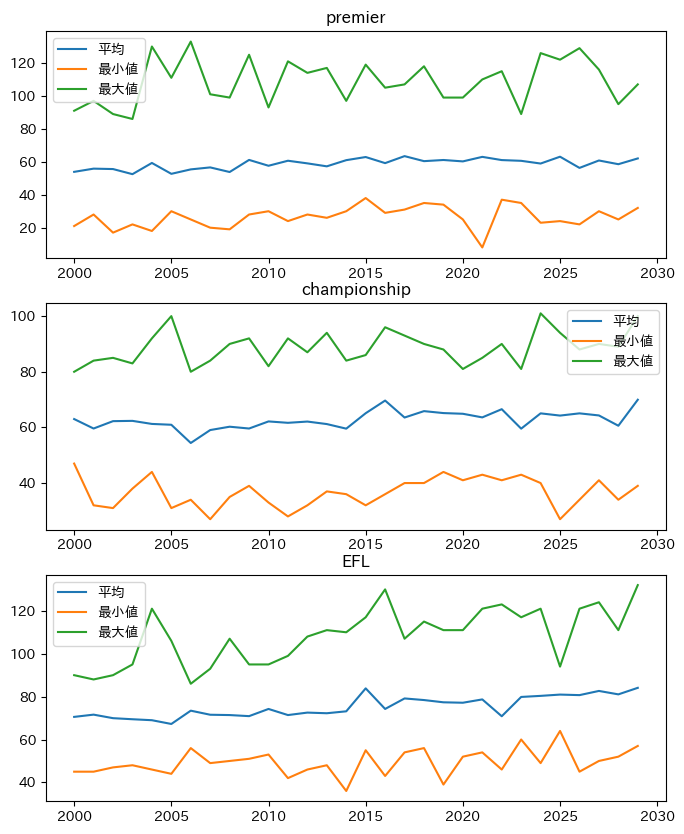

In [17]:
figure = plt.figure(figsize=(8, 10))
for league_num in range(3):
    me = []
    mi = []
    ma = []
    st = []
    for year in range(2000, end_year):
        output_ = England.leagues[league_num].team_result[f"{England.leagues[league_num].name}_{year}"]
        me.append(output_["得点"].mean())
        mi.append(output_["得点"].min())
        ma.append(output_["得点"].max())
        st.append(output_["得点"].std())
        x = [y for y in range(2000, end_year)]
    plt.subplot(3, 1, league_num+1)
    plt.plot(x, me, label="平均")
    plt.plot(x, mi, label="最小値")
    plt.plot(x, ma, label="最大値")
    #plt.plot(x, st, label="標準偏差")
    plt.title(f"{England.leagues[league_num].name}")
    plt.legend()
plt.show()

### 勝ち点

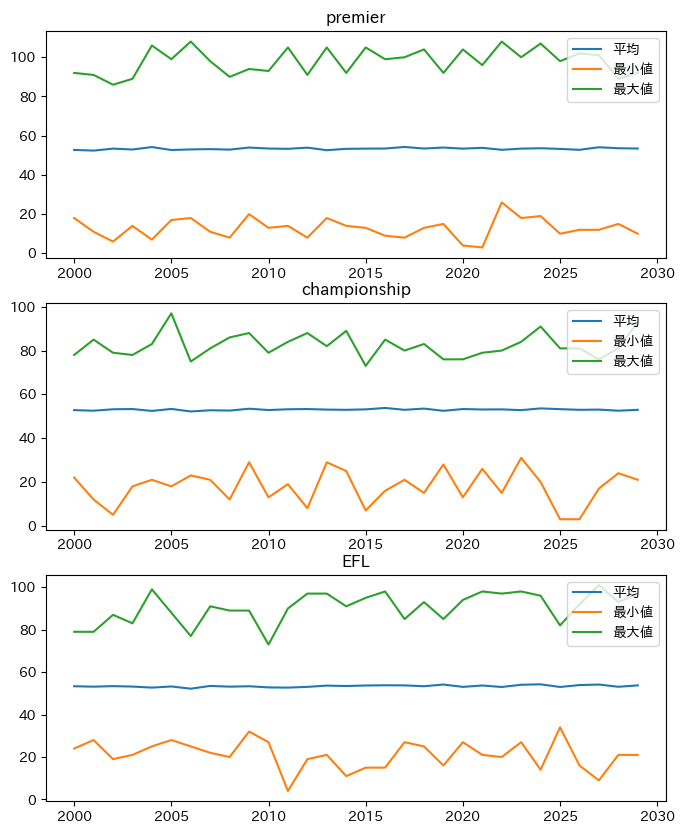

In [18]:
figure = plt.figure(figsize=(8, 10))
for league_num in range(3):
    me = []
    mi = []
    ma = []
    st = []
    for year in range(2000, end_year):
        output_ = England.leagues[league_num].team_result[f"{England.leagues[league_num].name}_{year}"]
        me.append(output_["Points"].mean())
        mi.append(output_["Points"].min())
        ma.append(output_["Points"].max())
        x = [y for y in range(2000, end_year)]
    plt.subplot(3, 1, league_num+1)
    plt.plot(x, me, label="平均")
    plt.plot(x, mi, label="最小値")
    plt.plot(x, ma, label="最大値")
    #plt.plot(x, st, label="標準偏差")
    plt.title(f"{England.leagues[league_num].name}")
    plt.legend()
plt.show()

In [19]:
output_

,win,lose,row,得点,失点,得失点差,Points,順位,リーグ名
Bradford,31,3,4,132,41,91,97,1位,EFL
Brussels,28,5,5,118,60,58,89,2位,EFL
Portsmouth,26,6,6,106,51,55,84,3位,EFL
Colombes,23,6,9,95,57,38,78,4位,EFL
Cardiff,23,8,7,105,58,47,76,5位,EFL
Aberdare,21,11,6,92,70,22,69,6位,EFL
Wolverhampton,20,10,8,109,73,36,68,7位,EFL
Motherwell,16,16,6,85,87,-2,54,8位,EFL
Middlesbrough,15,19,4,70,93,-23,49,9位,EFL
Geneva,14,18,6,73,85,-12,48,10位,EFL


## 引退年齢

In [20]:
all_member[(all_member["進退"]=="引退")].value_counts("年齢").sort_index()

年齢
26      2
27      7
28      7
29     33
30     81
31    236
32    411
33    535
34    581
35    498
36    379
37    261
38    132
39     51
40     16
41      2
dtype: int64

## 成長タイプ

In [21]:
all_member["成長タイプ"].value_counts()

general    3532
grass       962
genius      488
legend       54
Name: 成長タイプ, dtype: int64

In [22]:
all_member[all_member["成長タイプ"]=="legend"].sort_values("年齢", ascending=False)

,名前,チーム,リーグ,uuid,年齢,生まれ年,ポジション,Rate,成長タイプ,pac,sho,pas,dri,def,phy,進退
2596,Courtenay,The Hague,EFL,a44a46ec-4978-11ed-a42d-00155d14f69a,40,1982,CDM,79,legend,65,47,74,75,76,83,引退
3678,Deondric,The Hague,EFL,a3ef701e-4978-11ed-a42d-00155d14f69a,39,1982,CB,73,legend,47,42,65,65,73,73,引退
3663,Fenton,The Hague,EFL,a526441c-4978-11ed-a42d-00155d14f69a,39,1982,ST,68,legend,62,67,58,58,63,61,引退
1879,Leodis,The Hague,EFL,a54079c2-4978-11ed-a42d-00155d14f69a,39,1972,GK,46,legend,15,15,15,15,15,15,引退
1920,Wade,The Hague,EFL,a3b00ad2-4978-11ed-a42d-00155d14f69a,38,1982,CB,79,legend,68,41,63,56,77,77,引退
2074,Adi,The Hague,EFL,a39a3540-4978-11ed-a42d-00155d14f69a,38,1982,ST,78,legend,66,77,57,69,24,77,引退
3680,Danne,The Hague,EFL,a512b352-4978-11ed-a42d-00155d14f69a,38,1982,RB,61,legend,71,41,47,47,55,66,引退
2621,Jess,The Hague,EFL,a40dfd36-4978-11ed-a42d-00155d14f69a,38,1982,CB,74,legend,73,60,62,63,73,69,引退
3106,Edsel,The Hague,EFL,a42fba70-4978-11ed-a42d-00155d14f69a,38,1982,CB,73,legend,75,38,52,63,71,70,引退
3200,Tyrike,The Hague,EFL,a417ce4c-4978-11ed-a42d-00155d14f69a,37,1982,CB,79,legend,77,45,59,64,77,77,引退


In [23]:
buff = output[output["分類"]=="練習リーグ"]
buff[buff["Rate"]>68].head(20)

,名前,uuid,年齢,Rate,残契約,ポジション,リーグ,年度,チーム,レンタル元,分類,順位,試合数,goal,assist,CS,怪我欠場,怪我回数,賞


In [24]:
p = search_player(England, all_member, uuid_)

NameError: name 'uuid_' is not defined

,名前,年齢,生まれ年,成長タイプ
4911,Garth,36,1993,general


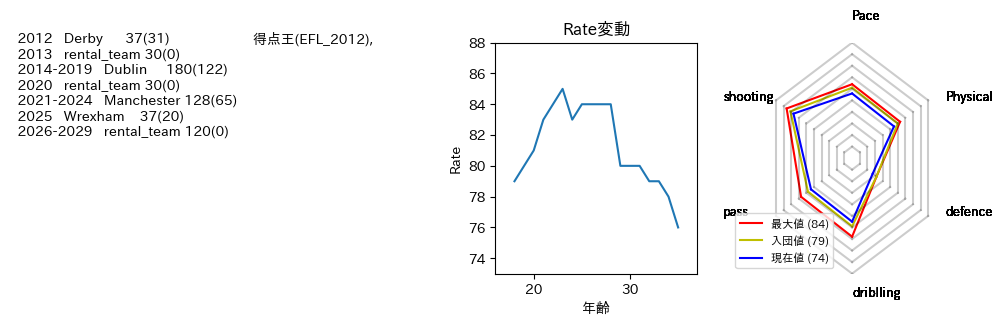

,名前,uuid,年齢,Rate,残契約,ポジション,リーグ,年度,チーム,レンタル元,分類,順位,試合数,goal,assist,CS,怪我欠場,怪我回数,賞
42457,Garth,c82fd072-4978-11ed-a42d-00155d14f69a,18,79,4,ST,EFL,2012,Derby,,リーグ,5位,36,31,4,5,3,1,"得点王(EFL_2012),"
43061,Garth,c82fd072-4978-11ed-a42d-00155d14f69a,19,80,3,ST,rental_league,2013,rental_team,Dublin,レンタルリーグ,記録なし,30,0,0,0,0,0,
47248,Garth,c82fd072-4978-11ed-a42d-00155d14f69a,20,81,2,ST,premier,2014,Dublin,,リーグ,2位,35,21,6,16,3,1,
50499,Garth,c82fd072-4978-11ed-a42d-00155d14f69a,21,83,1,ST,premier,2015,Dublin,,リーグ,2位,36,20,4,17,2,1,
53747,Garth,c82fd072-4978-11ed-a42d-00155d14f69a,22,84,0,ST,premier,2016,Dublin,,リーグ,2位,27,21,1,14,13,2,
56947,Garth,c82fd072-4978-11ed-a42d-00155d14f69a,23,85,2,ST,premier,2017,Dublin,,リーグ,4位,14,8,0,5,26,2,
60246,Garth,c82fd072-4978-11ed-a42d-00155d14f69a,24,83,1,ST,premier,2018,Dublin,,リーグ,5位,25,23,0,14,14,1,
63546,Garth,c82fd072-4978-11ed-a42d-00155d14f69a,25,84,0,ST,premier,2019,Dublin,,リーグ,4位,26,18,4,12,13,0,
66158,Garth,c82fd072-4978-11ed-a42d-00155d14f69a,26,84,1,ST,rental_league,2020,rental_team,Shrewsbury,レンタルリーグ,記録なし,30,0,0,0,0,0,
69871,Garth,c82fd072-4978-11ed-a42d-00155d14f69a,27,84,2,ST,premier,2021,Manchester,,リーグ,4位,32,23,6,13,8,2,


In [26]:
uuid_ = "c82fd072-4978-11ed-a42d-00155d14f69a"
print_player(England, all_member, uuid_)

In [ ]:
p.shooting_initial

In [ ]:
output